# Coding Derivatives 

Differential calculus allows us to determine how a function’s value changes when we adjust its inputs. This is particularly useful in deep learning optimization tasks, where we iteratively update model parameters to reduce the loss function. Optimization is the process of fitting a model to training data, and calculus is fundamental to making that possible. Still, our ultimate objective is to ensure strong performance on unseen data, a challenge known as generalization, which will be explored in later chapters.

In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In simple terms, a derivative measures how a function changes in response to small changes in its input variables. It indicates how quickly a loss function would rise or fall if each parameter were adjusted by an infinitely small amount. More formally, for functions $f: \mathbb{R} \to \mathbb{R}$
that map scalar inputs to scalar outputs, the derivative of a function at a point is defined as:
$$f\prime(x) = \lim_{h \to 0}\frac{f(x+h)-f(x)}{h}$$
Not every function is differentiable, including several that we aim to optimize. Since calculating the derivative of the loss is essential for most algorithms used to train deep neural networks, we often replace the original function with a differentiable surrogate to make optimization feasible.

We can interpret the derivative $f^{\prime}(x)$ as the instantaneous rate of change of $f(x)$ with respect to $x$. The below example gives you some intuition.

Let's define:
$$f(x) = 3x^{2} - 4x$$
By putting $x = 1$, $f^{\prime}(x)$ approaches 2 as $h \to 0$. Here's the code.

In [3]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [4]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


# Visualization Utilities

We can visualize the slopes of functions using the matplotlib library. First we setup the plotting environment, then we plot function $f(x)$ and its tangent line at $x = 1$.

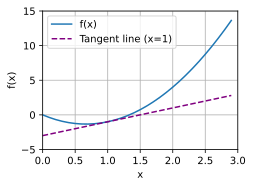

In [22]:
# Use the svg format to display a plot in Jupyter.
backend_inline.set_matplotlib_formats('svg')

# Set the figure size for matplotlib.
d2l.plt.rcParams['figure.figsize'] = (3.5, 2.5)

# Set the axes for matplotlib.
axes = d2l.plt.gca()
axes.cla()
axes.set_xlabel("x")
axes.set_ylabel("f(x)")

axes.set_xscale("linear")
axes.set_yscale("linear")

axes.set_xlim(0,3)
axes.set_ylim(-5,15)

# Plot the function.
x = np.arange(0, 3, 0.1)
axes.plot(x,f(x))
axes.plot(x, 2 * x - 3, color='purple', linestyle='--')
legend=['f(x)', 'Tangent line (x=1)']
axes.legend(legend)
axes.grid()





# Partial Derivatives and Gradients

Let $y = f(x_{1}, x_{2},...,x_{n})$ be a function with $n$ variables. The *partial derivative* of $y$ with respect to its $i^{th}$ parameter $x_{i}$ is
$$\frac{\partial y}{\partial x_{i}} = \lim_{h \to 0}\frac{f(x_{1}, ... , x_{i-1},x_{i}+h, x_{i+1}, ... , x_{n})-f(x_{1}, ... , x_{i} , ... , x_{n})}{h}$$

For instance, consider the function, 
$$f(x,y) = x^{2}y + \sin(xy)$$
We can calculate the partial derivative respect to x and y at point $(2,3)$ by the code below:

In [33]:
import numpy as np

# Define function
def f(x, y):
    return x**2 * y + np.sin(x*y)

# Partial derivative w.r.t x (finite difference)
def partial_x(x, y, h=1e-5):
    return (f(x+h, y) - f(x-h, y)) / (2*h)

# Partial derivative w.r.t y
def partial_y(x, y, h=1e-5):
    return (f(x, y+h) - f(x, y-h)) / (2*h)

print("∂f/∂x =", partial_x(2.0, 3.0))
print("∂f/∂y =", partial_y(2.0, 3.0))


∂f/∂x = 14.880510859693883
∂f/∂y = 5.920340573251081


We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain a vector that is called the gradient of the function. Suppose that the input of function $f: \mathbb{R}^{n} \to \mathbb{R}$ is an n-dimensional vector 
$$\textbf{x} = 
\begin{bmatrix}
x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{bmatrix}
$$ 
and the output is a scalar. The gradient of the function $f$ with respect to $\textbf{x}$ is a vector of $n$ partial derivatives:
$$\nabla f(\textbf{x}) = 
\begin{bmatrix}
\partial_{x_1}f(\textbf{x})\\
\partial_{x_2}f(\textbf{x})\\
\vdots\\
\partial_{x_n}f(\textbf{x})\\
\end{bmatrix}$$

As an example, the function
$$f(x,y) = x^{2} + y^{2}$$
has gradient 

$$\nabla f(\textbf{x}) = 
\begin{bmatrix}
\frac{\partial f}{\partial x}\\
\\
\frac{\partial f}{\partial y}\\
\end{bmatrix} =
\begin{bmatrix}
2x\\
\\
2y\\
\end{bmatrix} 
$$
Here is the code for calculation of the gradient and plotting the gradient field.

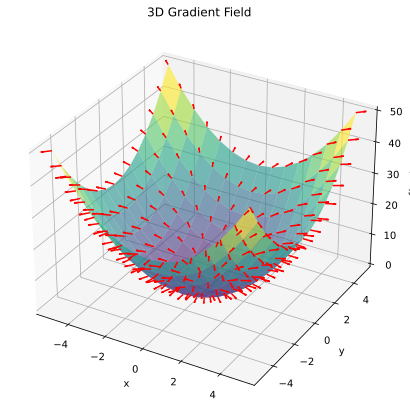

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid
x_vals = np.linspace(-5, 5, 15)
y_vals = np.linspace(-5, 5, 15)
X, Y = np.meshgrid(x_vals, y_vals)

# Function
Z = X**2 + Y**2

# Gradients
grad_x = 2 * X
grad_y = 2 * Y

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot arrows (gradient vectors) with arrowheads
q = ax.quiver(X, Y, Z, grad_x, grad_y, np.zeros_like(Z),
              length=0.5, arrow_length_ratio=0.3, color='red', normalize=True)

# Labels
ax.set_title("3D Gradient Field ")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.show()


The following rules come in handy for differentiating multivariate functions:
- Suppose $\textbf{x}\in\mathbb{R}^{n}$ (a column vector) and $\textbf{A}\in \mathbb{R}^{m\times n}$. The function $f(\textbf{x})=\textbf{Ax}$ is linear, and its derivative is just the transpose of $\textbf{A}$
$$\nabla(\mathbf{Ax}) = A^{\mathsf{T}}$$

   
- For square matrices $\textbf{A}\in\mathbb{R}^{n\times n}$ we have that:
$$\nabla(\mathbf{x}^{\mathsf{T}}\mathbf{A}\mathbf{x}) = (\mathbf{A} + \mathbf{A}^{\mathsf{T}})\mathbf{x}$$ 
and in particular
$$\nabla\|\mathbf{x}\|^{2} = \nabla \mathbf{x}^{\mathsf{T}}\mathbf{x} = 2 \mathbf{x}$$


# Chain Rule

Suppose you have:
$$y = f(u)\quad,\quad u = g(x)$$
where both $f$ and $g$ are differentiable functions of a single variable $x$.

The chain rule states:
$$\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}$$
This captures the idea that changes in $x$ affect $y$ through an intermediate variable $u$. In deep learning, this is exactly how we propagate gradients through each layer of a neural network.

Now consider a multivariate function:
$$y = f(\mathbf{u})\quad,\quad\mathbf{u} = g(\mathbf{x})$$
where:
$$\mathbf{x} = (x_1, x_2, \dots, x_n)^\top \in \mathbb{R}^n\quad, 
\quad
\mathbf{u} = (u_1, u_2, \dots, u_m)^\top \in \mathbb{R}^m$$
Each component $u_i = g_i(\mathbf{x})$ depends on all $x_j$.  

The partial derivative of $y$ with respect to one input variable $x_i$ is:
$$\frac{\partial y}{\partial x_i} =
\frac{\partial y}{\partial u_1}\frac{\partial u_1}{\partial x_i} +
\frac{\partial y}{\partial u_2}\frac{\partial u_2}{\partial x_i} +
\dots +
\frac{\partial y}{\partial u_m}\frac{\partial u_m}{\partial x_i}$$
This is a sum of contributions, where each intermediate variable $u_k$ passes part of the change from $x_i$ to $y$.

We can express this in compact linear algebra form by defining the **Jacobian matrix**:
$$\mathbf{A} = \frac{\partial \mathbf{u}}{\partial \mathbf{x}} =
\begin{bmatrix}
\frac{\partial u_1}{\partial x_1} & \dots & \frac{\partial u_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial u_m}{\partial x_1} & \dots & \frac{\partial u_m}{\partial x_n}
\end{bmatrix} \in \mathbb{R}^{m \times n}$$

Gradient of $y$ with respect to $\mathbf{u}$:
$$\nabla_{\mathbf{u}} y =
\begin{bmatrix}
\frac{\partial y}{\partial u_1}\\
\frac{\partial y}{\partial u_2}\\
\vdots\\
\frac{\partial y}{\partial u_m}
\end{bmatrix}$$

Then, the chain rule becomes:
$$\nabla_{\mathbf{x}} y = \mathbf{A}^\top \nabla_{\mathbf{u}} y$$

Neural networks consist of many nested functions:
$$y = f_L(f_{L-1}(\dots f_1(\mathbf{x})\dots))$$
Each layer $f_l$ transforms inputs to outputs.  
To train the network, we compute:
$$\frac{\partial y}{\partial \mathbf{x}} =
\frac{\partial y}{\partial \mathbf{u}^{(L-1)}}
\frac{\partial \mathbf{u}^{(L-1)}}{\partial \mathbf{u}^{(L-2)}}
\dots
\frac{\partial \mathbf{u}^{(1)}}{\partial \mathbf{x}}$$

Backpropagation is essentially repeated application of this multivariate chain rule, using Jacobians or their efficient equivalents.



## Discussion

Although this discussion only begins to address the complexities of the topic, several fundamental principles are already evident. First, the established rules of differentiation can be applied in a systematic and mechanical manner, enabling the automatic computation of gradients without the need for creative intervention. This allows cognitive resources to be directed toward higher-level analytical tasks. Second, determining the derivatives of vector-valued functions entails the multiplication of matrices as one navigates the dependency structure linking outputs to inputs. This computational graph is traversed in the forward direction during function evaluation and in the backward direction during gradient calculation. Subsequent chapters will provide a rigorous introduction to backpropagation, the algorithmic framework that operationalizes the chain rule in this context.

From the standpoint of optimization theory, gradients serve as a fundamental tool for guiding parameter updates in order to minimize the loss function, and each iteration of the optimization algorithms discussed throughout this text relies critically on gradient evaluation.

# Exercises

1. Find the gradient of the function $f(\mathbf{x}) = 3x_{1}^{2} + 5e^{x_{2}}$ .

2. What is the gradient of the function $f(\mathbf{x}) = \|\mathbf{x}\|_{2}$? What happens for $\mathbf{x} = \mathbf{0}$?

3. Can you write out the chain rule for the case where $u=f(x,y,z)$ and $x = x(a,b), y = (a,b),$ and $z = z(a,b)$?